In [20]:
#ML_NaiveBayes

In [21]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [43]:
provided_dataset = datasets.make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state = 123)
X, y= provided_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1234)


In [44]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00'])

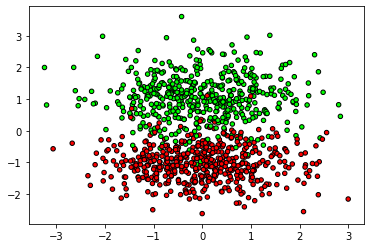

In [45]:
plt.scatter(X[:, 0], X[:, 8], c = y, cmap = cmap, s = 20, edgecolor = 'k')

In [48]:
class NaiveBayes:
    
    #This code is written considering classes are labelled as 0, 1, 2 ...
    #Also it is assumed that training set contains all the class labels at least once. 
    #Therefore (n+1)/(d+2) method is also not used.
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
        self._var = np.zeros((n_classes, n_features), dtype = np.float64)
        self._priors = np.zeros(n_classes, dtype = np.float64)
        
        for c in self._classes:
            X_c = X[c == y]
            self._mean[c, :] = X_c.mean(axis = 0)
            self._var[c, :] = X_c.var(axis = 0)
            self._priors[c] = X_c.shape[0]/n_samples
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior_log = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self.pdf_gauss(idx, x)))
            posterior = prior_log + class_conditional
            posteriors.append(posterior)
                
        return self._classes[np.argmax(posteriors)]
    
    def pdf_gauss(self, idx, x):
        
        #Data is in the form of Gaussian Distribution
        
        mean = self._mean[idx, :]
        var = self._var[idx, :]
        numerator = np.exp((-1*(x-mean)**2)/(2*var))
        denominator = 1/np.sqrt(2*np.pi*var)
        return numerator/denominator
        

In [49]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictedY = nb.predict(X_test)
acc = np.sum(predictedY == y_test)/len(y_test)
print(acc)

0.915
